<a href="https://colab.research.google.com/github/wurifah/Bisaai/blob/main/sewa_atm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import beberapa library yang dibutuhkan

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# pembacaan dataset
df = pd.read_excel('data-set.xlsx')
df

,NO,Tanggal Request,Nama lokasi,KOTA,MASA SEWA,Delivery,Type,Jatuh tempo,Tagihan,Unnamed: 9,...,Unnamed: 268,Unnamed: 269,Tagihan.99,Unnamed: 271,Unnamed: 272,Tagihan.100,Unnamed: 274,Unnamed: 275,Tagihan.101,Unnamed: 277
0,1.0,2010-09-21 00:00:00,PLN Kota,Jkt-HUB II RPC,NaN,40458,522,41548,379-11-10,40452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2010-09-21 00:00:00,Perumnas,Jkt-HUB I RPC,NaN,40458,522,41548,379-11-10,40452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,2010-09-21 00:00:00,Tip Top Depok,Jkt-HUB VIII RPC,NaN,40458,522,41548,379-11-10,40452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,2010-09-21 00:00:00,Tip Top Pdk Bambu,Jkt-HUB VI RPC,NaN,40458,522,41548,379-11-10,40452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2010-09-21 00:00:00,Tip Top Rawamangun,JKT-HUB VII,NaN,40458,529EPP7,41548,379-11-10,40452,...,43497.0,NaN,070-03-19,43525.0,NaN,095-04-19,43556.0,NaN,122-05-19,43586.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Cleaning dan Preprocessing

In [3]:
# Pengubahan nama kolom agar lebih mudah pembacaan
# semua karakter diubah menjadi huruf kecil dan spasi diubah menjadi underscore (_)

df.columns = df.columns.str.replace(' ','_').str.lower()
df.tail(5)

,no,tanggal_request,nama_lokasi,kota,masa_sewa,delivery,type,jatuh_tempo,tagihan,unnamed:_9,...,unnamed:_268,unnamed:_269,tagihan.99,unnamed:_271,unnamed:_272,tagihan.100,unnamed:_274,unnamed:_275,tagihan.101,unnamed:_277
65775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65779,NaN,NaN,NaN,NaN,NaN,42594,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dataset diatas terdiri dari banyak sekali kolom yaitu sebanyak 278 kolom. Kita ambil beberapa kolom yang akan kita analisis seperti Tanggal Request, Nama Lokasi, Kota, Masa Sewa, Delivery, Type dan Jatuh Tempo

In [4]:
columns = ['tanggal_request','nama_lokasi','kota','masa_sewa','delivery','type','jatuh_tempo']
data = pd.DataFrame(df, columns=columns)
data

,tanggal_request,nama_lokasi,kota,masa_sewa,delivery,type,jatuh_tempo
0,2010-09-21 00:00:00,PLN Kota,Jkt-HUB II RPC,NaN,40458,522,41548
1,2010-09-21 00:00:00,Perumnas,Jkt-HUB I RPC,NaN,40458,522,41548
2,2010-09-21 00:00:00,Tip Top Depok,Jkt-HUB VIII RPC,NaN,40458,522,41548
3,2010-09-21 00:00:00,Tip Top Pdk Bambu,Jkt-HUB VI RPC,NaN,40458,522,41548
4,2010-09-21 00:00:00,Tip Top Rawamangun,JKT-HUB VII,NaN,40458,529EPP7,41548
...,...,...,...,...,...,...,...
65775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65776,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65777,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65778,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Cek row yang mengandung missing/NaN value
under_threshold_removed = data.dropna(axis='index', thresh=2, inplace=False)
under_threshold_rows = data[~data.index.isin(under_threshold_removed.index)]
print(under_threshold_rows)

      tanggal_request nama_lokasi kota masa_sewa delivery type jatuh_tempo
1247              NaN         NaN  NaN       NaN      NaN  NaN         NaN
1248              NaN         NaN  NaN       NaN      NaN  NaN         NaN
1249              NaN         NaN  NaN       NaN      NaN  NaN         NaN
1250              NaN         NaN  NaN       NaN      NaN  NaN         NaN
1251              NaN         NaN  NaN       NaN      NaN  NaN         NaN
...               ...         ...  ...       ...      ...  ...         ...
65775             NaN         NaN  NaN       NaN      NaN  NaN         NaN
65776             NaN         NaN  NaN       NaN      NaN  NaN         NaN
65777             NaN         NaN  NaN       NaN      NaN  NaN         NaN
65778             NaN         NaN  NaN       NaN      NaN  NaN         NaN
65779             NaN         NaN  NaN       NaN    42594  NaN         NaN

[64530 rows x 7 columns]


Pada dataset sangat banyak sekali baris yang mengandung nilai NaN value yang kebanyakan dimulai dari baris 1247 sampai baris 65779. Hal ini disebabkan pada kolom delivery terdapat data pada baris ke 65779 sedangkan pada kolom yang lain tidak terdapat data. Kemungkinan data pada kolom delivery baris ke-65779 tidak berarti karena di kolom yang lain tidak ada data pada baris yang sama. Untuk itu kita hapus semua kolom pada baris 1247-65779 dengan parameter kolom adalah kolom nama_lokasi karena kolom tersebut tidak terdapat missing value dari baris pertama sampai baris ke-1246

In [6]:
data.dropna(subset=["nama_lokasi"], axis=0, inplace=True)

In [7]:
data.shape

(1251, 7)

Jumlah baris semuanya ada 1250 tanpa judul. Hal ini dimungkinkan baris ke-1247 sampai 1250 pada kolom nama_lokasi bukan merupakan missing value

In [8]:
data.isnull().sum()

tanggal_request     76
nama_lokasi          0
kota                 4
masa_sewa          830
delivery           166
type               110
jatuh_tempo        179
dtype: int64

In [9]:
data

,tanggal_request,nama_lokasi,kota,masa_sewa,delivery,type,jatuh_tempo
0,2010-09-21 00:00:00,PLN Kota,Jkt-HUB II RPC,NaN,40458,522,41548
1,2010-09-21 00:00:00,Perumnas,Jkt-HUB I RPC,NaN,40458,522,41548
2,2010-09-21 00:00:00,Tip Top Depok,Jkt-HUB VIII RPC,NaN,40458,522,41548
3,2010-09-21 00:00:00,Tip Top Pdk Bambu,Jkt-HUB VI RPC,NaN,40458,522,41548
4,2010-09-21 00:00:00,Tip Top Rawamangun,JKT-HUB VII,NaN,40458,529EPP7,41548
...,...,...,...,...,...,...,...
1246,NaN,TASPEN PEKANBARU,PEKANBARU,4,NaN,GRGW10,NaN
1273,NaN,Mataram,NaN,NaN,NaN,NaN,NaN
1274,Nov'13,Banjarmasin,NaN,NaN,NaN,NaN,NaN
1275,Nov'13,Banjarmasin,NaN,NaN,NaN,NaN,NaN


Selanjutnya, disini kita akan menganalisis data lebih jauh mengenai nama lokasi, kota dan type. Karena pada kolom kota nilai missing value berada di 4 kolom terakhir, maka kita hapus semua kolom pada 4 baris terakhir. Tindakan ini dilakukan karena pada proses selanjutnya kita tidak akan bisa memproses data apabila pada kolom kota masih ada missing value

In [10]:
data.drop(data.tail(4).index, inplace=True)

In [11]:
data

,tanggal_request,nama_lokasi,kota,masa_sewa,delivery,type,jatuh_tempo
0,2010-09-21 00:00:00,PLN Kota,Jkt-HUB II RPC,NaN,40458,522,41548
1,2010-09-21 00:00:00,Perumnas,Jkt-HUB I RPC,NaN,40458,522,41548
2,2010-09-21 00:00:00,Tip Top Depok,Jkt-HUB VIII RPC,NaN,40458,522,41548
3,2010-09-21 00:00:00,Tip Top Pdk Bambu,Jkt-HUB VI RPC,NaN,40458,522,41548
4,2010-09-21 00:00:00,Tip Top Rawamangun,JKT-HUB VII,NaN,40458,529EPP7,41548
...,...,...,...,...,...,...,...
1242,NaN,KK RS SARDJITO/ KAMPUS ITY,YOGYAKARTA,4,44155,529EPP7CL,45627
1243,NaN,MARI MALL,MAKASAR,4,NaN,GRGW10,NaN
1244,NaN,BANDARA HASANUDIN,MAKASAR,4,NaN,GRGW10,NaN
1245,NaN,KK RS. SYAFIRA,PEKANBARU,4,NaN,GRGW10,NaN


Proses selanjutnya yaitu kita mengubah data pada kolom nama_lokasi dan kolom kota semuanya menjadi huruf kecil. Hal ini dilakukan karena tidak ada perbedaan makna antara huruf kecil dengan huruf besar dan hal tersebut akan mempermudah proses identifikasi

In [12]:
data['kota_kecil'] = data['kota'].str.lower()
data['lokasi_kecil'] = data['nama_lokasi'].str.lower()
data

,tanggal_request,nama_lokasi,kota,masa_sewa,delivery,type,jatuh_tempo,kota_kecil,lokasi_kecil
0,2010-09-21 00:00:00,PLN Kota,Jkt-HUB II RPC,NaN,40458,522,41548,jkt-hub ii rpc,pln kota
1,2010-09-21 00:00:00,Perumnas,Jkt-HUB I RPC,NaN,40458,522,41548,jkt-hub i rpc,perumnas
2,2010-09-21 00:00:00,Tip Top Depok,Jkt-HUB VIII RPC,NaN,40458,522,41548,jkt-hub viii rpc,tip top depok
3,2010-09-21 00:00:00,Tip Top Pdk Bambu,Jkt-HUB VI RPC,NaN,40458,522,41548,jkt-hub vi rpc,tip top pdk bambu
4,2010-09-21 00:00:00,Tip Top Rawamangun,JKT-HUB VII,NaN,40458,529EPP7,41548,jkt-hub vii,tip top rawamangun
...,...,...,...,...,...,...,...,...,...
1242,NaN,KK RS SARDJITO/ KAMPUS ITY,YOGYAKARTA,4,44155,529EPP7CL,45627,yogyakarta,kk rs sardjito/ kampus ity
1243,NaN,MARI MALL,MAKASAR,4,NaN,GRGW10,NaN,makasar,mari mall
1244,NaN,BANDARA HASANUDIN,MAKASAR,4,NaN,GRGW10,NaN,makasar,bandara hasanudin
1245,NaN,KK RS. SYAFIRA,PEKANBARU,4,NaN,GRGW10,NaN,pekanbaru,kk rs. syafira


#Analisis

### Pada proses selanjutnya, kita akan melakukan analisis dari dataset. Analisis yang akan kita lakukan yaitu kita mencari:

1. Tipe ATM yang jumlahnya terbanyak

2. Kota dengan permintaan terbanyak dan tipe pada kota tersebut

3. Lokasi dengan permintaan ATM terbanyak  dan tipe pada lokasi tersebut

## 1. Tipe ATM dengan jumlah terbanyak

In [13]:
tipe = data['type'].value_counts()
print(tipe)

529EPP7CL    318
GRG          172
529          129
529EPP7      122
522S         105
GRGW10        97
WIN           53
522           37
-             37
529EPP5W7     33
522           24
HYS            6
520            3
Cancel         1
cancel         1
522D           1
GRG            1
520 D          1
Name: type, dtype: int64


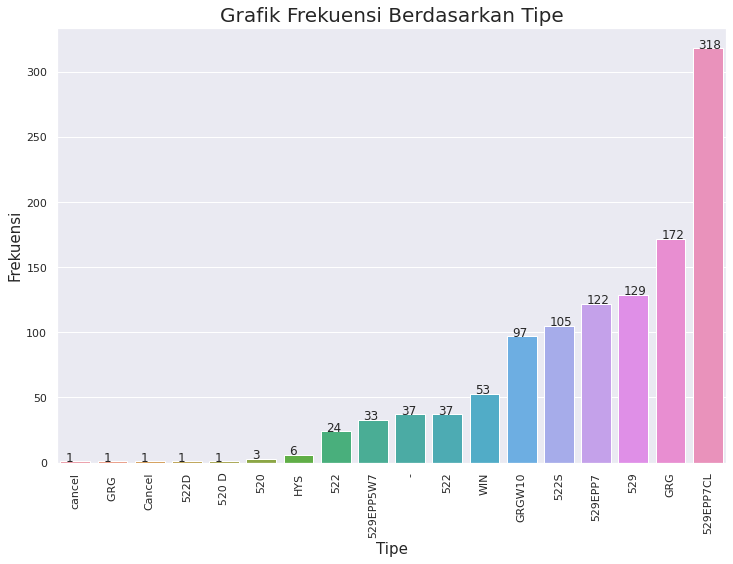

In [ ]:
plt.figure(figsize=(12,8))
sns.set_theme(style="darkgrid")
small_to_large = data.groupby('type').size().sort_values().index[::1]
ax = sns.countplot(x='type',data=data, order=small_to_large)
plt.title('Grafik Frekuensi Berdasarkan Tipe', fontsize = 20)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0))
plt.ylabel('Frekuensi', fontsize = 15)
plt.xlabel('Tipe', fontsize = 15)
plt.xticks(rotation=90)
plt.savefig('frekuensi_tipe.png')
plt.show()

Berdasarkan grafik diatas, dapat diketahui bahwa tipe ATM dengan peminat terbanyak yaitu tipe 529EPP7CL dengan jumlah ATM sebanyak 318, selanjutnya tipe GRG sebanyak 172, 529 sebanyak 129, 529EPP7 sebanyak 122.

## 2. Kota dengan permintaan terbanyak dan tipe pada kota tersebut

Disini kita akan seleksi jumlah ATM berdasarkan kota. Kita menyeleksi kota dengan ATM terbanyak, lalu mencari jumlah tipe pada masing-masing kota tersebut. Kota yang diseleksi hanya 5 kota dengan jumlah terbanyak

In [14]:
kota_jkt = data[data['kota_kecil'].str.contains('jkt')]
kota_jkt.shape

(364, 9)

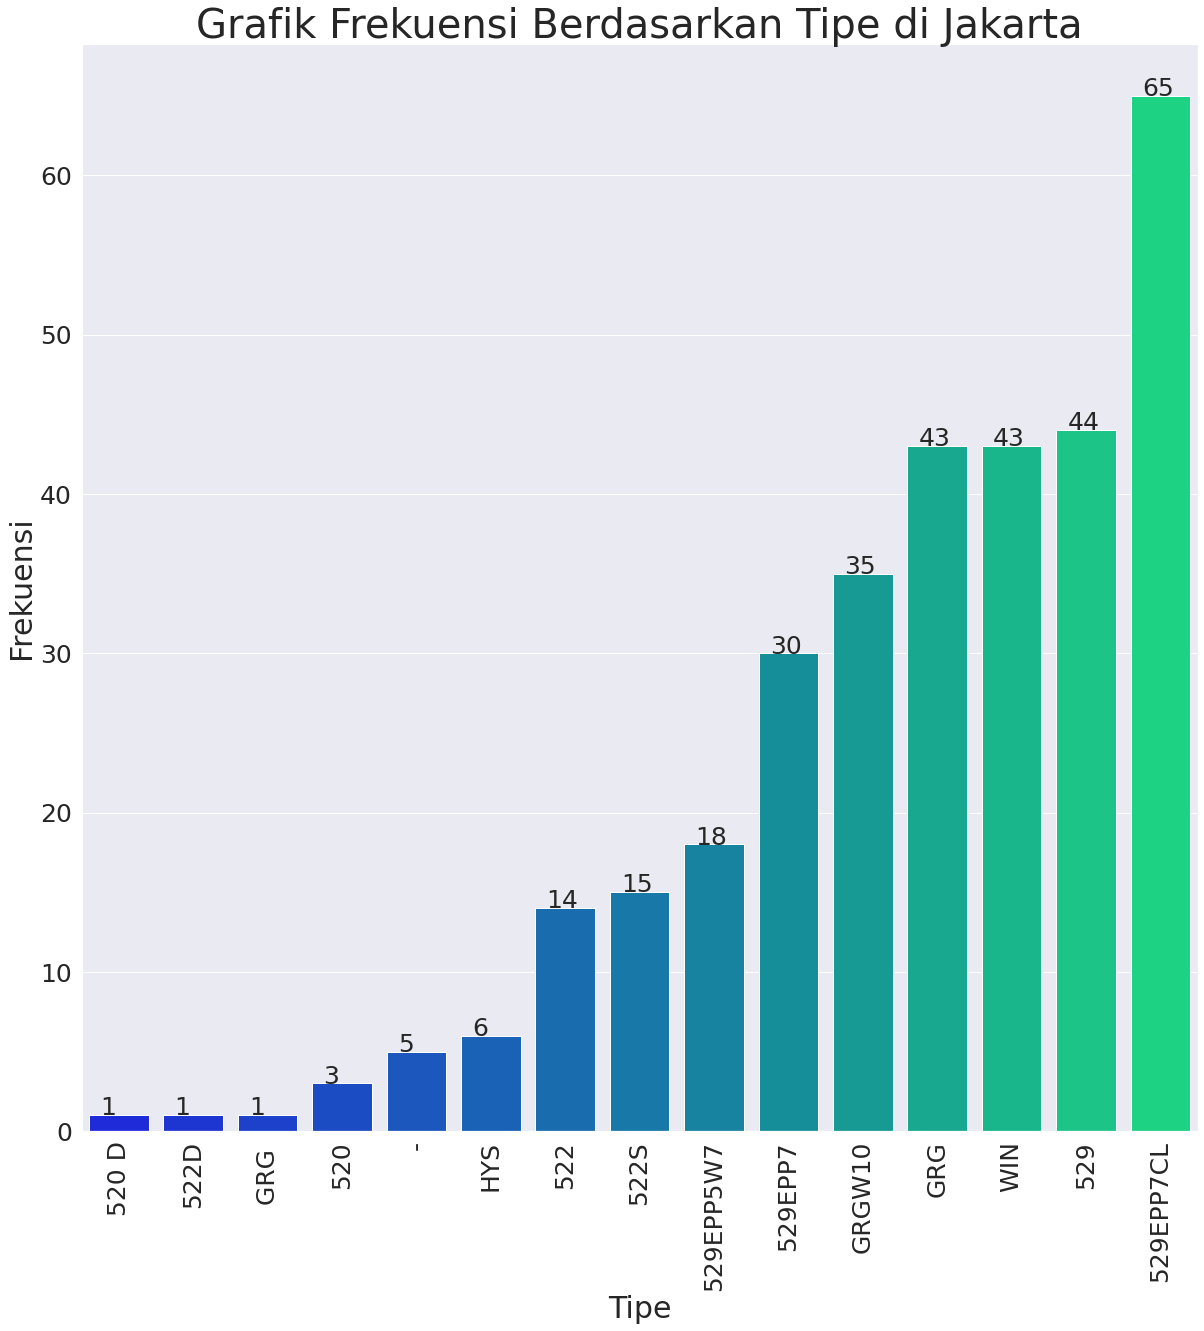

In [21]:
plt.figure(figsize=(20,20))
sns.set_theme(style="darkgrid")
small_to_large = kota_jkt.groupby('type').size().sort_values().index[::1]
ax = sns.countplot(x='type',data=kota_jkt,palette='winter', order=small_to_large)
plt.title('Grafik Frekuensi Berdasarkan Tipe di Jakarta', fontsize = 40)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0), fontsize = 25)
plt.ylabel('Frekuensi', fontsize = 30)
plt.xlabel('Tipe', fontsize = 30)
plt.xticks(rotation=90, fontsize = 25)
plt.yticks(fontsize = 25)
plt.savefig('jakarta.png')
plt.show()

In [23]:
kota_jakarta = data[data['kota_kecil'].str.contains('jakarta')]
kota_jakarta

,tanggal_request,nama_lokasi,kota,masa_sewa,delivery,type,jatuh_tempo,kota_kecil,lokasi_kecil
118,2011-06-13 00:00:00,KK Dolog Klp Gading,Jakarta Pusat cancel,NaN,Cancel,NaN,NaN,jakarta pusat cancel,kk dolog klp gading
119,2011-06-13 00:00:00,KK PLN Lenteng Agung,Jakarta Barat cancel,NaN,Cancel,NaN,NaN,jakarta barat cancel,kk pln lenteng agung
128,2012-04-12 00:00:00,Capem Cakung Dua,Jakarta Timur cancel,NaN,Cancel,NaN,NaN,jakarta timur cancel,capem cakung dua
137,2012-08-30 00:00:00,Atrium Plaza,Jakarta Pusat cancel,NaN,Cancel,NaN,NaN,jakarta pusat cancel,atrium plaza


In [24]:
kota_surabaya = data[data['kota_kecil'].str.contains('surabaya')]
kota_surabaya.shape

(66, 9)

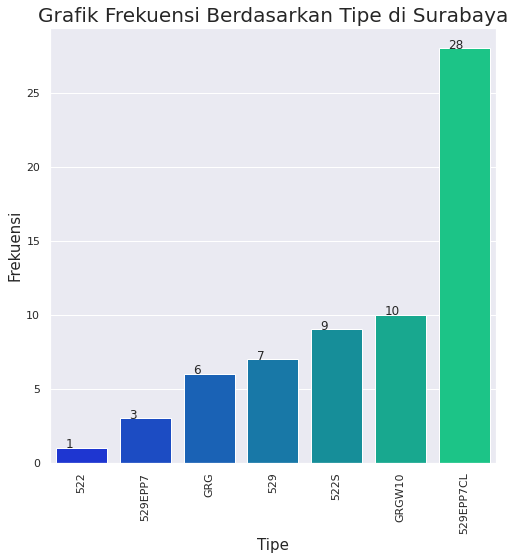

In [25]:
plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid")
small_to_large = kota_surabaya.groupby('type').size().sort_values().index[::1]
ax = sns.countplot(x='type',data=kota_surabaya,palette='winter', order=small_to_large)
plt.title('Grafik Frekuensi Berdasarkan Tipe di Surabaya', fontsize = 20)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0))
plt.ylabel('Frekuensi', fontsize = 15)
plt.xlabel('Tipe', fontsize = 15)
plt.xticks(rotation=90)
plt.savefig('frekuensi_tipe_Surabaya.png')
plt.show()

In [26]:
kota_makasar = data[data['kota_kecil'].str.contains('makasar')]
kota_makasar.shape

(54, 9)

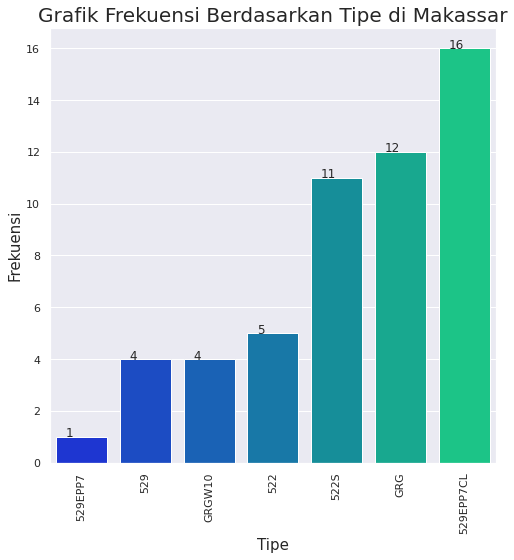

In [27]:
plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid")
small_to_large = kota_makasar.groupby('type').size().sort_values().index[::1]
ax = sns.countplot(x='type',data=kota_makasar,palette='winter', order=small_to_large)
plt.title('Grafik Frekuensi Berdasarkan Tipe di Makassar', fontsize = 20)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0))
plt.ylabel('Frekuensi', fontsize = 15)
plt.xlabel('Tipe', fontsize = 15)
plt.xticks(rotation=90)
plt.savefig('frekuensi_tipe_makassar.png')
plt.show()

In [28]:
kota_solo = data[data['kota_kecil'].str.contains('solo')]
kota_solo.shape

(52, 9)

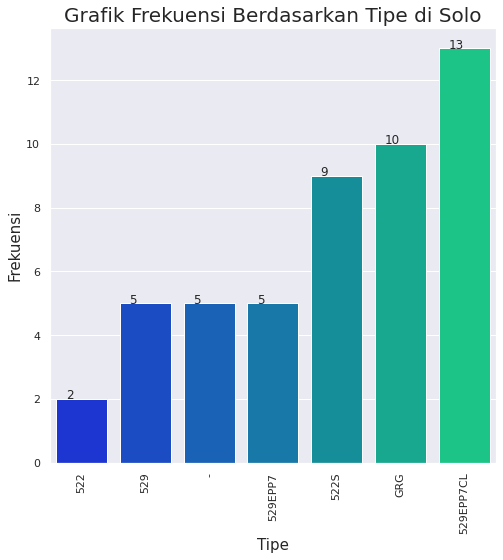

In [29]:
plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid")
small_to_large = kota_solo.groupby('type').size().sort_values().index[::1]
ax = sns.countplot(x='type',data=kota_solo,palette='winter', order=small_to_large)
plt.title('Grafik Frekuensi Berdasarkan Tipe di Solo', fontsize = 20)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0))
plt.ylabel('Frekuensi', fontsize = 15)
plt.xlabel('Tipe', fontsize = 15)
plt.xticks(rotation=90)
plt.savefig('frekuensi_tipe_solo.png')
plt.show()

In [30]:
kota_bandung = data[data['kota_kecil'].str.contains('bandung')]
kota_bandung.shape

(49, 9)

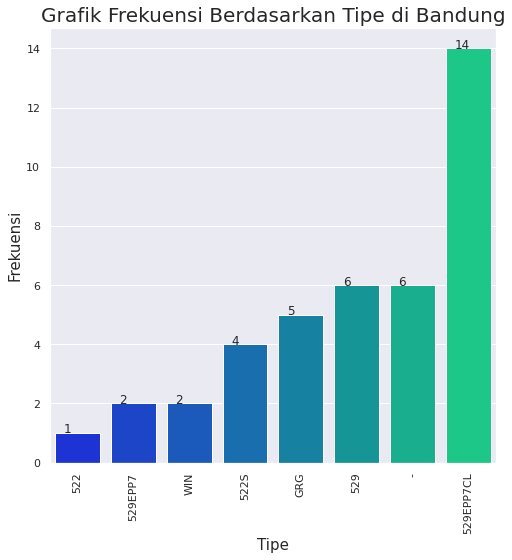

In [31]:
plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid")
small_to_large = kota_bandung.groupby('type').size().sort_values().index[::1]
ax = sns.countplot(x='type',data=kota_bandung,palette='winter', order=small_to_large)
plt.title('Grafik Frekuensi Berdasarkan Tipe di Bandung', fontsize = 20)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0))
plt.ylabel('Frekuensi', fontsize = 15)
plt.xlabel('Tipe', fontsize = 15)
plt.xticks(rotation=90)
plt.savefig('frekuensi_tipe_bandung.png')
plt.show()

## 3. Lokasi dengan permintaan ATM terbanyak  dan tipe pada lokasi tersebut

Disini kita akan seleksi jumlah ATM berdasarkan lokasi. Kita menyeleksi lokasi dengan ATM terbanyak, lalu mencari jumlah tipe pada masing-masing lokasi tersebut. Lokasi yang diseleksi hanya 5 Lokasi dengan jumlah terbanyak

In [32]:
lokasi_rs = data[data['lokasi_kecil'].str.contains('rs')]
lokasi_rs.shape

(123, 9)

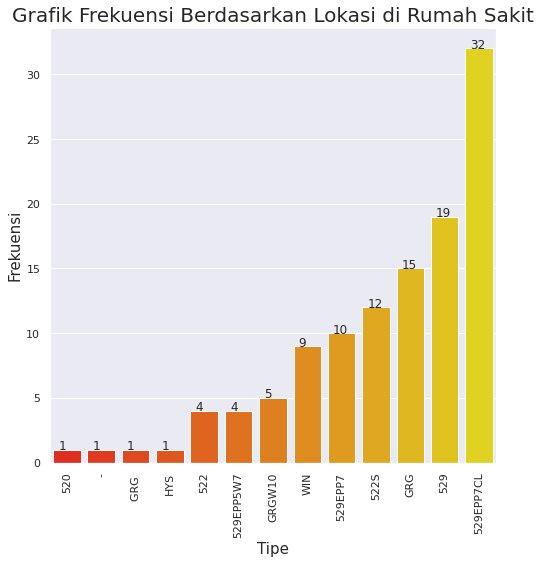

In [34]:
plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid")
small_to_large = lokasi_rs.groupby('type').size().sort_values().index[::1]
ax = sns.countplot(x='type',data=lokasi_rs,palette='autumn', order=small_to_large)
plt.title('Grafik Frekuensi Berdasarkan Lokasi di Rumah Sakit', fontsize = 20)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0))
plt.ylabel('Frekuensi', fontsize = 15)
plt.xlabel('Tipe', fontsize = 15)
plt.xticks(rotation=90)
plt.savefig('frekuensi_tipe_RS.png')
plt.show()

In [35]:
lokasi_indomaret = data[data['lokasi_kecil'].str.contains('indomaret')]
lokasi_indomaret.shape

(110, 9)

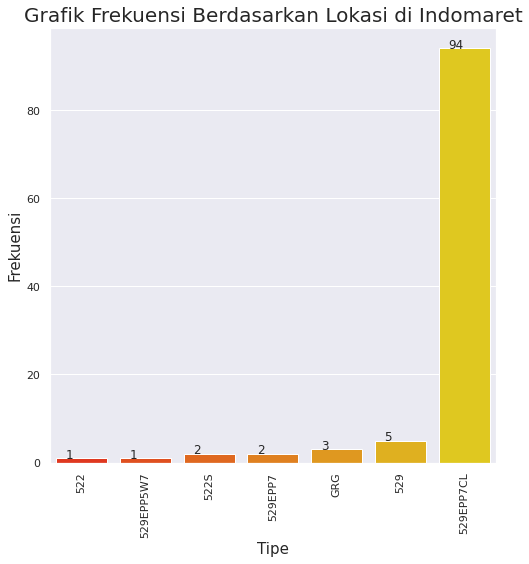

In [36]:
plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid")
small_to_large = lokasi_indomaret.groupby('type').size().sort_values().index[::1]
ax = sns.countplot(x='type',data=lokasi_indomaret,palette='autumn', order=small_to_large)
plt.title('Grafik Frekuensi Berdasarkan Lokasi di Indomaret', fontsize = 20)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0))
plt.ylabel('Frekuensi', fontsize = 15)
plt.xlabel('Tipe', fontsize = 15)
plt.xticks(rotation=90)
plt.savefig('frekuensi_tipe_indomaret.png')
plt.show()

In [37]:
lokasi_spbu = data[data['lokasi_kecil'].str.contains('spbu')]
lokasi_spbu.shape

(107, 9)

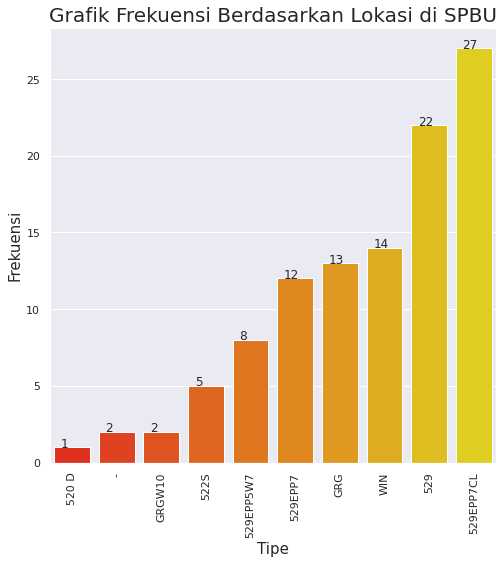

In [38]:
plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid")
small_to_large = lokasi_spbu.groupby('type').size().sort_values().index[::1]
ax = sns.countplot(x='type',data=lokasi_spbu,palette='autumn', order=small_to_large)
plt.title('Grafik Frekuensi Berdasarkan Lokasi di SPBU', fontsize = 20)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0))
plt.ylabel('Frekuensi', fontsize = 15)
plt.xlabel('Tipe', fontsize = 15)
plt.xticks(rotation=90)
plt.savefig('frekuensi_tipe_SPBU.png')
plt.show()

In [39]:
lokasi_mall = data[data['lokasi_kecil'].str.contains('mall')]
lokasi_mall.shape

(67, 9)

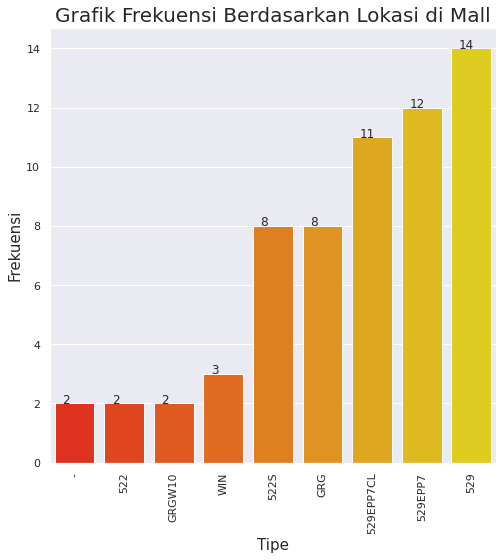

In [40]:
plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid")
small_to_large = lokasi_mall.groupby('type').size().sort_values().index[::1]
ax = sns.countplot(x='type',data=lokasi_mall,palette='autumn', order=small_to_large)
plt.title('Grafik Frekuensi Berdasarkan Lokasi di Mall', fontsize = 20)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0))
plt.ylabel('Frekuensi', fontsize = 15)
plt.xlabel('Tipe', fontsize = 15)
plt.xticks(rotation=90)
plt.savefig('frekuensi_tipe_Mall.png')
plt.show()

In [ ]:
lokasi_sevel = data[data['lokasi_kecil'].str.contains('sevel')]
lokasi_sevel.shape

(51, 9)

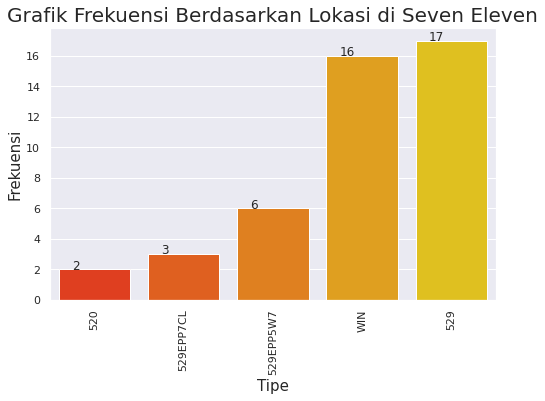

In [ ]:
plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid")
small_to_large = lokasi_sevel.groupby('type').size().sort_values().index[::1]
ax = sns.countplot(x='type',data=lokasi_sevel,palette='autumn', order=small_to_large)
plt.title('Grafik Frekuensi Berdasarkan Lokasi di Seven Eleven', fontsize = 20)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0))
plt.ylabel('Frekuensi', fontsize = 15)
plt.xlabel('Tipe', fontsize = 15)
plt.xticks(rotation=90)
plt.savefig('frekuensi_tipe_711.png')
plt.show()